# Analysis of shared mutations between dome and trigone

In [1]:
import pandas as pd
import os
import itertools
from tqdm import tqdm
tqdm.pandas()
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append('/data/bbg/projects/bladder_ts/notebooks/manuscript_figures_vMay2025_45') 
from consensus_variables import * 

In [4]:
deepcsa_dir = deepcsa_run_dir
maf_file = os.path.join(deepcsa_dir, "clean_somatic/all_samples.somatic.mutations.tsv")

In [5]:
panel = ['KMT2D','ARID1A','KDM6A','RBM10',
           'EP300','STAG2','CREBBP','NOTCH2',
           'FOXQ1','CDKN1A','KMT2C','TP53',
           'RB1','FGFR3',
         'PIK3CA','TERTpromoter'
        ] # 16 genes ok!

## Analyze the shared mutations between all possible pairs of samples

In [6]:
maf_df = pd.read_csv(maf_file, sep = "\t")
maf_df

/tmp/ipykernel_3704710/1164717758.py:1: DtypeWarning: Columns (49,92,112) have mixed types. Specify dtype option on import or set low_memory=False.
  maf_df = pd.read_csv(maf_file, sep = "\t")


,CHROM,POS,REF,ALT,FILTER,INFO,FORMAT,SAMPLE,DEPTH,ALT_DEPTH,...,FILTER.not_searched_COMPLEX,FILTER.MSI12,FILTER.AM_not_searched_SV,FILTER.not_searched_SV,FILTER.SN1.5,FILTER.q22.5,FILTER.v1,FILTER.low_mappability,FILTER.Bias,FILTER.d3
0,chr1,26729450,T,C,low_complex_repetitive;not_in_exons;pSTD,SAMPLE=P19_0024_BTR_01;TYPE=SNV;DP=930;VD=1;AF...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:930:1:929,1:0.0011:929,0:1,0:930:929,1:3:1...",930,1,...,False,False,False,False,False,False,False,False,False,False
1,chr1,26729474,TAG,T,low_complex_repetitive;not_in_exons;pSTD,SAMPLE=P19_0014_BDO_01;TYPE=Deletion;DP=1470;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1470:1:1469,1:0.0007:1469,0:1,0:1470:1469,...",1470,1,...,False,False,False,False,False,False,False,False,False,False
2,chr1,26729479,TTC,T,low_complex_repetitive;not_in_exons;pSTD,SAMPLE=P19_0023_BDO_01;TYPE=Deletion;DP=1984;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1984:1:1983,1:0.0005:1983,0:1,0:1961:1960,...",1961,1,...,False,False,False,False,False,False,False,False,False,False
3,chr1,26729563,G,C,not_in_exons;pSTD,SAMPLE=P19_0023_BDO_01;TYPE=SNV;DP=3490;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:3490:1:3489,1:0.0003:2657,832:1,0:3490:348...",3490,1,...,False,False,False,False,False,False,False,False,False,False
4,chr1,26729566,TA,T,not_in_exons;p10;pSTD,SAMPLE=P19_0040_BTR_01;TYPE=Deletion;DP=2168;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:2168:1:2167,1:0.0005:1845,322:0,1:2114:211...",2114,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64273,chrX,124100705,AAT,A,not_in_exons;p10;pSTD,SAMPLE=P19_0025_BDO_01;TYPE=Deletion;DP=2650;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:2650:1:2649,1:0.0004:405,2244:0,1:2720:271...",2720,1,...,False,False,False,False,False,False,False,False,False,False
64274,chrX,124100722,C,T,not_in_exons;pSTD,SAMPLE=P19_0003_BDO_01;TYPE=SNV;DP=2046;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:2046:1:2045,1:0.0005:135,1910:0,1:2049:204...",2049,1,...,False,False,False,False,False,False,False,False,False,False
64275,chrX,124100743,G,C,not_in_exons;pSTD,SAMPLE=P19_0052_BTR_01;TYPE=SNV;DP=1441;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1441:1:1440,1:0.0007:53,1387:0,1:1441:1440...",1441,1,...,False,False,False,False,False,False,False,False,False,False
64276,chrX,124100757,T,G,not_in_exons;pSTD,SAMPLE=P19_0038_BDO_01;TYPE=SNV;DP=1168;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1168:1:1167,1:0.0009:8,1159:0,1:1168:1167,...",1168,1,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# change sample name 
maf_df["SAMPLE_ID_short"] = maf_df.apply(lambda row: f'{row["SAMPLE_ID"].split("_")[2][1:]}{row["SAMPLE_ID"].split("_")[1][2:]}', axis = 1)
maf_df

,CHROM,POS,REF,ALT,FILTER,INFO,FORMAT,SAMPLE,DEPTH,ALT_DEPTH,...,FILTER.MSI12,FILTER.AM_not_searched_SV,FILTER.not_searched_SV,FILTER.SN1.5,FILTER.q22.5,FILTER.v1,FILTER.low_mappability,FILTER.Bias,FILTER.d3,SAMPLE_ID_short
0,chr1,26729450,T,C,low_complex_repetitive;not_in_exons;pSTD,SAMPLE=P19_0024_BTR_01;TYPE=SNV;DP=930;VD=1;AF...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:930:1:929,1:0.0011:929,0:1,0:930:929,1:3:1...",930,1,...,False,False,False,False,False,False,False,False,False,TR24
1,chr1,26729474,TAG,T,low_complex_repetitive;not_in_exons;pSTD,SAMPLE=P19_0014_BDO_01;TYPE=Deletion;DP=1470;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1470:1:1469,1:0.0007:1469,0:1,0:1470:1469,...",1470,1,...,False,False,False,False,False,False,False,False,False,DO14
2,chr1,26729479,TTC,T,low_complex_repetitive;not_in_exons;pSTD,SAMPLE=P19_0023_BDO_01;TYPE=Deletion;DP=1984;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1984:1:1983,1:0.0005:1983,0:1,0:1961:1960,...",1961,1,...,False,False,False,False,False,False,False,False,False,DO23
3,chr1,26729563,G,C,not_in_exons;pSTD,SAMPLE=P19_0023_BDO_01;TYPE=SNV;DP=3490;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:3490:1:3489,1:0.0003:2657,832:1,0:3490:348...",3490,1,...,False,False,False,False,False,False,False,False,False,DO23
4,chr1,26729566,TA,T,not_in_exons;p10;pSTD,SAMPLE=P19_0040_BTR_01;TYPE=Deletion;DP=2168;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:2168:1:2167,1:0.0005:1845,322:0,1:2114:211...",2114,1,...,False,False,False,False,False,False,False,False,False,TR40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64273,chrX,124100705,AAT,A,not_in_exons;p10;pSTD,SAMPLE=P19_0025_BDO_01;TYPE=Deletion;DP=2650;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:2650:1:2649,1:0.0004:405,2244:0,1:2720:271...",2720,1,...,False,False,False,False,False,False,False,False,False,DO25
64274,chrX,124100722,C,T,not_in_exons;pSTD,SAMPLE=P19_0003_BDO_01;TYPE=SNV;DP=2046;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:2046:1:2045,1:0.0005:135,1910:0,1:2049:204...",2049,1,...,False,False,False,False,False,False,False,False,False,DO03
64275,chrX,124100743,G,C,not_in_exons;pSTD,SAMPLE=P19_0052_BTR_01;TYPE=SNV;DP=1441;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1441:1:1440,1:0.0007:53,1387:0,1:1441:1440...",1441,1,...,False,False,False,False,False,False,False,False,False,TR52
64276,chrX,124100757,T,G,not_in_exons;pSTD,SAMPLE=P19_0038_BDO_01;TYPE=SNV;DP=1168;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1168:1:1167,1:0.0009:8,1159:0,1:1168:1167,...",1168,1,...,False,False,False,False,False,False,False,False,False,DO38


In [9]:
len(maf_df["SAMPLE_ID_short"].unique())

79

In [8]:
# create MUT_ID to identify shared muts
maf_df["MUT_ID"] = maf_df.apply(lambda row: f'{row["CHROM"]}:{row["POS"]}_{row["REF"]}>{row["ALT"]}', axis = 1)
maf_df

,CHROM,POS,REF,ALT,FILTER,INFO,FORMAT,SAMPLE,DEPTH,ALT_DEPTH,...,FILTER.MSI12,FILTER.AM_not_searched_SV,FILTER.not_searched_SV,FILTER.SN1.5,FILTER.q22.5,FILTER.v1,FILTER.low_mappability,FILTER.Bias,FILTER.d3,SAMPLE_ID_short
0,chr1,26729450,T,C,low_complex_repetitive;not_in_exons;pSTD,SAMPLE=P19_0024_BTR_01;TYPE=SNV;DP=930;VD=1;AF...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:930:1:929,1:0.0011:929,0:1,0:930:929,1:3:1...",930,1,...,False,False,False,False,False,False,False,False,False,TR24
1,chr1,26729474,TAG,T,low_complex_repetitive;not_in_exons;pSTD,SAMPLE=P19_0014_BDO_01;TYPE=Deletion;DP=1470;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1470:1:1469,1:0.0007:1469,0:1,0:1470:1469,...",1470,1,...,False,False,False,False,False,False,False,False,False,DO14
2,chr1,26729479,TTC,T,low_complex_repetitive;not_in_exons;pSTD,SAMPLE=P19_0023_BDO_01;TYPE=Deletion;DP=1984;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1984:1:1983,1:0.0005:1983,0:1,0:1961:1960,...",1961,1,...,False,False,False,False,False,False,False,False,False,DO23
3,chr1,26729563,G,C,not_in_exons;pSTD,SAMPLE=P19_0023_BDO_01;TYPE=SNV;DP=3490;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:3490:1:3489,1:0.0003:2657,832:1,0:3490:348...",3490,1,...,False,False,False,False,False,False,False,False,False,DO23
4,chr1,26729566,TA,T,not_in_exons;p10;pSTD,SAMPLE=P19_0040_BTR_01;TYPE=Deletion;DP=2168;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:2168:1:2167,1:0.0005:1845,322:0,1:2114:211...",2114,1,...,False,False,False,False,False,False,False,False,False,TR40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64273,chrX,124100705,AAT,A,not_in_exons;p10;pSTD,SAMPLE=P19_0025_BDO_01;TYPE=Deletion;DP=2650;V...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:2650:1:2649,1:0.0004:405,2244:0,1:2720:271...",2720,1,...,False,False,False,False,False,False,False,False,False,DO25
64274,chrX,124100722,C,T,not_in_exons;pSTD,SAMPLE=P19_0003_BDO_01;TYPE=SNV;DP=2046;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:2046:1:2045,1:0.0005:135,1910:0,1:2049:204...",2049,1,...,False,False,False,False,False,False,False,False,False,DO03
64275,chrX,124100743,G,C,not_in_exons;pSTD,SAMPLE=P19_0052_BTR_01;TYPE=SNV;DP=1441;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1441:1:1440,1:0.0007:53,1387:0,1:1441:1440...",1441,1,...,False,False,False,False,False,False,False,False,False,TR52
64276,chrX,124100757,T,G,not_in_exons;pSTD,SAMPLE=P19_0038_BDO_01;TYPE=SNV;DP=1168;VD=1;A...,GT:DP:VD:AD:AF:RD:ALD:CDP:CAD:NDP:CDPAM:CADAM:...,"0/1:1168:1:1167,1:0.0009:8,1159:0,1:1168:1167,...",1168,1,...,False,False,False,False,False,False,False,False,False,DO38


In [10]:
# count number of shared muts between every pair of samples: total, missense, nonsense, synonymous
shared_muts_dfs_dict = {}
impacts = ["allsnvs", "missense", "nonsense", "synonymous", "indels", "nonprotaffecting", "truncating"]
for impact in impacts:
    print(impact)
    if impact == "allsnvs":
        maf_df_f = maf_df.loc[maf_df["TYPE"] == "SNV"].copy()
    elif impact == "indels":
        maf_df_f = maf_df.loc[maf_df["TYPE"].isin(["INSERTION", "DELETION"])].copy()
    elif impact == "nonprotaffecting":
        maf_df_f = maf_df.loc[maf_df["Protein_affecting"] == "non_protein_affecting"].copy()
    elif impact == "truncating":
        maf_df_f = maf_df.loc[(maf_df["TYPE"] == "SNV") & (maf_df["canonical_Consequence_broader"].isin(["nonsense", "essential_splice"]))].copy()
    else:
        maf_df_f = maf_df.loc[(maf_df["TYPE"] == "SNV") & (maf_df["canonical_Consequence_broader"] == impact)].copy()
    shared_muts_df = pd.DataFrame(index = maf_df["SAMPLE_ID_short"].unique().tolist(), columns = maf_df["SAMPLE_ID_short"].unique().tolist())
    
    for sample1 in tqdm(maf_df["SAMPLE_ID_short"].unique()):
        sample1_muts = set(maf_df_f.loc[maf_df_f["SAMPLE_ID_short"] == sample1]["MUT_ID"].values)
        
        for sample2 in maf_df["SAMPLE_ID_short"].unique():
            sample2_muts = set(maf_df_f.loc[maf_df_f["SAMPLE_ID_short"] == sample2]["MUT_ID"].values)
    
            shared_muts_df.loc[sample1, sample2] = len(sample1_muts.intersection(sample2_muts))

    shared_muts_dfs_dict[impact] = shared_muts_df.reset_index(names = "sample1").melt(
        id_vars = "sample1", var_name = "sample2", value_name = f"numb_shared_muts_{impact}")

allsnvs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:18<00:00,  4.30it/s]


missense


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:06<00:00, 11.50it/s]


nonsense


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:05<00:00, 15.70it/s]


synonymous


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:02<00:00, 34.32it/s]


indels


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:09<00:00,  8.29it/s]


nonprotaffecting


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:06<00:00, 12.88it/s]


truncating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:06<00:00, 12.48it/s]


In [11]:
# merge
shared_muts_df = shared_muts_dfs_dict["allsnvs"].merge(shared_muts_dfs_dict["missense"], on = ["sample1", "sample2"], how = "inner").merge(
    shared_muts_dfs_dict["nonsense"], on = ["sample1", "sample2"], how = "inner"
).merge(
    shared_muts_dfs_dict["synonymous"], on = ["sample1", "sample2"], how = "inner"
).merge(
    shared_muts_dfs_dict["indels"], on = ["sample1", "sample2"], how = "inner"
).merge(
    shared_muts_dfs_dict["nonprotaffecting"], on = ["sample1", "sample2"], how = "inner"
).merge(
    shared_muts_dfs_dict["truncating"], on = ["sample1", "sample2"], how = "inner"
)
shared_muts_df

,sample1,sample2,numb_shared_muts_allsnvs,numb_shared_muts_missense,numb_shared_muts_nonsense,numb_shared_muts_synonymous,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,numb_shared_muts_truncating
0,TR24,TR24,320,116,36,25,92,170,42
1,DO14,TR24,8,2,3,0,6,4,3
2,DO23,TR24,16,1,8,1,6,8,8
3,TR40,TR24,10,1,2,1,5,8,2
4,TR02,TR24,8,2,1,1,2,7,1
...,...,...,...,...,...,...,...,...,...
6236,TR13,TR36,3,0,0,2,3,4,0
6237,DO06,TR36,1,0,0,1,2,2,0
6238,TR41,TR36,2,0,1,1,5,2,1
6239,TR27,TR36,2,1,0,1,3,1,0


In [12]:
# count number of mutations per sample per impact
impacts = ["allsnvs", "missense", "nonsense", "synonymous", "indels", "nonprotaffecting", "truncating"]
for impact in impacts:
    print(impact)
    if impact == "allsnvs":
        maf_df_f = maf_df.loc[maf_df["TYPE"] == "SNV"].copy()
    elif impact == "indels":
        maf_df_f = maf_df.loc[maf_df["TYPE"].isin(["INSERTION", "DELETION"])].copy()
    elif impact == "nonprotaffecting":
        maf_df_f = maf_df.loc[maf_df["Protein_affecting"] == "non_protein_affecting"].copy()
    elif impact == "truncating":
        maf_df_f = maf_df.loc[(maf_df["TYPE"] == "SNV") & (maf_df["canonical_Consequence_broader"].isin(["nonsense", "essential_splice"]))].copy()
    else:
        maf_df_f = maf_df.loc[(maf_df["TYPE"] == "SNV") & (maf_df["canonical_Consequence_broader"] == impact)].copy()

    nmuts_df = maf_df_f.groupby("SAMPLE_ID_short").size().to_frame(f"sample1_numb_muts_{impact}").reset_index(names = "sample1")
    shared_muts_df = shared_muts_df.merge(nmuts_df, on = "sample1", how = "inner")
    nmuts_df = nmuts_df.rename({f"sample1_numb_muts_{impact}": f"sample2_numb_muts_{impact}", "sample1": "sample2"}, axis = 1)
    shared_muts_df = shared_muts_df.merge(nmuts_df, on = "sample2", how = "inner")

shared_muts_df

allsnvs
missense
nonsense
synonymous
indels
nonprotaffecting
truncating


,sample1,sample2,numb_shared_muts_allsnvs,numb_shared_muts_missense,numb_shared_muts_nonsense,numb_shared_muts_synonymous,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,numb_shared_muts_truncating,sample1_numb_muts_allsnvs,...,sample1_numb_muts_nonsense,sample2_numb_muts_nonsense,sample1_numb_muts_synonymous,sample2_numb_muts_synonymous,sample1_numb_muts_indels,sample2_numb_muts_indels,sample1_numb_muts_nonprotaffecting,sample2_numb_muts_nonprotaffecting,sample1_numb_muts_truncating,sample2_numb_muts_truncating
0,TR24,TR24,320,116,36,25,92,170,42,320,...,36,36,25,25,92,92,170,170,42,42
1,DO14,TR24,8,2,3,0,6,4,3,608,...,137,36,50,25,297,92,234,170,182,42
2,DO23,TR24,16,1,8,1,6,8,8,1198,...,254,36,70,25,537,92,414,170,358,42
3,TR40,TR24,10,1,2,1,5,8,2,159,...,27,36,17,25,128,92,97,170,35,42
4,TR02,TR24,8,2,1,1,2,7,1,988,...,112,36,101,25,260,92,382,170,170,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6236,TR13,TR36,3,0,0,2,3,4,0,128,...,2,1,17,8,35,23,82,27,3,1
6237,DO06,TR36,1,0,0,1,2,2,0,310,...,100,1,19,8,167,23,77,27,119,1
6238,TR41,TR36,2,0,1,1,5,2,1,289,...,80,1,24,8,191,23,74,27,105,1
6239,TR27,TR36,2,1,0,1,3,1,0,123,...,2,1,27,8,54,23,93,27,5,1


In [13]:
# calculate jaccard index: shared / (sample1+sample2-shared)
impacts = ["allsnvs", "missense", "nonsense", "synonymous", "indels", "nonprotaffecting", "truncating"]
for impact in tqdm(impacts):
    shared_muts_df[f"jaccard_index_{impact}"] = shared_muts_df[f"numb_shared_muts_{impact}"] / ( shared_muts_df[f"sample1_numb_muts_{impact}"] + shared_muts_df[f"sample2_numb_muts_{impact}"] - shared_muts_df[f"numb_shared_muts_{impact}"] )

shared_muts_df

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 1249.10it/s]


,sample1,sample2,numb_shared_muts_allsnvs,numb_shared_muts_missense,numb_shared_muts_nonsense,numb_shared_muts_synonymous,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,numb_shared_muts_truncating,sample1_numb_muts_allsnvs,...,sample2_numb_muts_nonprotaffecting,sample1_numb_muts_truncating,sample2_numb_muts_truncating,jaccard_index_allsnvs,jaccard_index_missense,jaccard_index_nonsense,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,jaccard_index_truncating
0,TR24,TR24,320,116,36,25,92,170,42,320,...,170,42,42,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,DO14,TR24,8,2,3,0,6,4,3,608,...,170,182,42,0.008696,0.006024,0.017647,0.0,0.015666,0.01,0.013575
2,DO23,TR24,16,1,8,1,6,8,8,1198,...,170,358,42,0.010652,0.001859,0.028369,0.010638,0.009631,0.013889,0.020408
3,TR40,TR24,10,1,2,1,5,8,2,159,...,170,35,42,0.021322,0.005988,0.032787,0.02439,0.023256,0.030888,0.026667
4,TR02,TR24,8,2,1,1,2,7,1,988,...,170,170,42,0.006154,0.003704,0.006803,0.008,0.005714,0.012844,0.004739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6236,TR13,TR36,3,0,0,2,3,4,0,128,...,27,3,1,0.019231,0.0,0.0,0.086957,0.054545,0.038095,0.0
6237,DO06,TR36,1,0,0,1,2,2,0,310,...,27,119,1,0.002941,0.0,0.0,0.038462,0.010638,0.019608,0.0
6238,TR41,TR36,2,0,1,1,5,2,1,289,...,27,105,1,0.006289,0.0,0.0125,0.032258,0.023923,0.020202,0.009524
6239,TR27,TR36,2,1,0,1,3,1,0,123,...,27,5,1,0.013158,0.021277,0.0,0.029412,0.040541,0.008403,0.0


In [14]:
# add donor ID and bladder location
shared_muts_df["sample1_donorID"] = shared_muts_df.apply(lambda row: row["sample1"][2:], axis = 1)
shared_muts_df["sample2_donorID"] = shared_muts_df.apply(lambda row: row["sample2"][2:], axis = 1)
shared_muts_df["sample1_bladder_location"] = shared_muts_df.apply(lambda row: row["sample1"][:2], axis = 1)
shared_muts_df["sample2_bladder_location"] = shared_muts_df.apply(lambda row: row["sample2"][:2], axis = 1)
shared_muts_df = shared_muts_df.replace("TR", "trigone")
shared_muts_df = shared_muts_df.replace("DO", "dome")
shared_muts_df

,sample1,sample2,numb_shared_muts_allsnvs,numb_shared_muts_missense,numb_shared_muts_nonsense,numb_shared_muts_synonymous,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,numb_shared_muts_truncating,sample1_numb_muts_allsnvs,...,jaccard_index_missense,jaccard_index_nonsense,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,jaccard_index_truncating,sample1_donorID,sample2_donorID,sample1_bladder_location,sample2_bladder_location
0,TR24,TR24,320,116,36,25,92,170,42,320,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24,24,trigone,trigone
1,DO14,TR24,8,2,3,0,6,4,3,608,...,0.006024,0.017647,0.000000,0.015666,0.010000,0.013575,14,24,dome,trigone
2,DO23,TR24,16,1,8,1,6,8,8,1198,...,0.001859,0.028369,0.010638,0.009631,0.013889,0.020408,23,24,dome,trigone
3,TR40,TR24,10,1,2,1,5,8,2,159,...,0.005988,0.032787,0.024390,0.023256,0.030888,0.026667,40,24,trigone,trigone
4,TR02,TR24,8,2,1,1,2,7,1,988,...,0.003704,0.006803,0.008000,0.005714,0.012844,0.004739,02,24,trigone,trigone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6236,TR13,TR36,3,0,0,2,3,4,0,128,...,0.000000,0.000000,0.086957,0.054545,0.038095,0.000000,13,36,trigone,trigone
6237,DO06,TR36,1,0,0,1,2,2,0,310,...,0.000000,0.000000,0.038462,0.010638,0.019608,0.000000,06,36,dome,trigone
6238,TR41,TR36,2,0,1,1,5,2,1,289,...,0.000000,0.012500,0.032258,0.023923,0.020202,0.009524,41,36,trigone,trigone
6239,TR27,TR36,2,1,0,1,3,1,0,123,...,0.021277,0.000000,0.029412,0.040541,0.008403,0.000000,27,36,trigone,trigone


In [15]:
# reorder columns
shared_muts_df = shared_muts_df[[
    'sample1', 'sample1_donorID', 'sample1_bladder_location',
    'sample2', 'sample2_donorID', 'sample2_bladder_location',
    'sample1_numb_muts_allsnvs', 'sample2_numb_muts_allsnvs',
    'sample1_numb_muts_missense', 'sample2_numb_muts_missense',
    'sample1_numb_muts_nonsense', 'sample2_numb_muts_nonsense',
    'sample1_numb_muts_truncating', 'sample2_numb_muts_truncating',
    'sample1_numb_muts_synonymous', 'sample2_numb_muts_synonymous',
    'sample1_numb_muts_indels', 'sample2_numb_muts_indels',
    'sample1_numb_muts_nonprotaffecting', 'sample2_numb_muts_nonprotaffecting',
    'numb_shared_muts_allsnvs', 'numb_shared_muts_missense',
    'numb_shared_muts_nonsense', 'numb_shared_muts_truncating', 'numb_shared_muts_synonymous', 
    'numb_shared_muts_indels', 'numb_shared_muts_nonprotaffecting',
    'jaccard_index_allsnvs', 'jaccard_index_missense',
    'jaccard_index_nonsense', 'jaccard_index_truncating', 'jaccard_index_synonymous',
    'jaccard_index_indels', 'jaccard_index_nonprotaffecting']]
shared_muts_df

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,sample1_numb_muts_missense,sample2_numb_muts_missense,...,numb_shared_muts_synonymous,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,jaccard_index_allsnvs,jaccard_index_missense,jaccard_index_nonsense,jaccard_index_truncating,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting
0,TR24,24,trigone,TR24,24,trigone,320,320,116,116,...,25,92,170,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,DO14,14,dome,TR24,24,trigone,608,320,218,116,...,0,6,4,0.008696,0.006024,0.017647,0.013575,0.000000,0.015666,0.010000
2,DO23,23,dome,TR24,24,trigone,1198,320,423,116,...,1,6,8,0.010652,0.001859,0.028369,0.020408,0.010638,0.009631,0.013889
3,TR40,40,trigone,TR24,24,trigone,159,320,52,116,...,1,5,8,0.021322,0.005988,0.032787,0.026667,0.024390,0.023256,0.030888
4,TR02,02,trigone,TR24,24,trigone,988,320,426,116,...,1,2,7,0.006154,0.003704,0.006803,0.004739,0.008000,0.005714,0.012844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6236,TR13,13,trigone,TR36,36,trigone,128,31,58,6,...,2,3,4,0.019231,0.000000,0.000000,0.000000,0.086957,0.054545,0.038095
6237,DO06,06,dome,TR36,36,trigone,310,31,116,6,...,1,2,2,0.002941,0.000000,0.000000,0.000000,0.038462,0.010638,0.019608
6238,TR41,41,trigone,TR36,36,trigone,289,31,113,6,...,1,5,2,0.006289,0.000000,0.012500,0.009524,0.032258,0.023923,0.020202
6239,TR27,27,trigone,TR36,36,trigone,123,31,42,6,...,1,3,1,0.013158,0.021277,0.000000,0.000000,0.029412,0.040541,0.008403


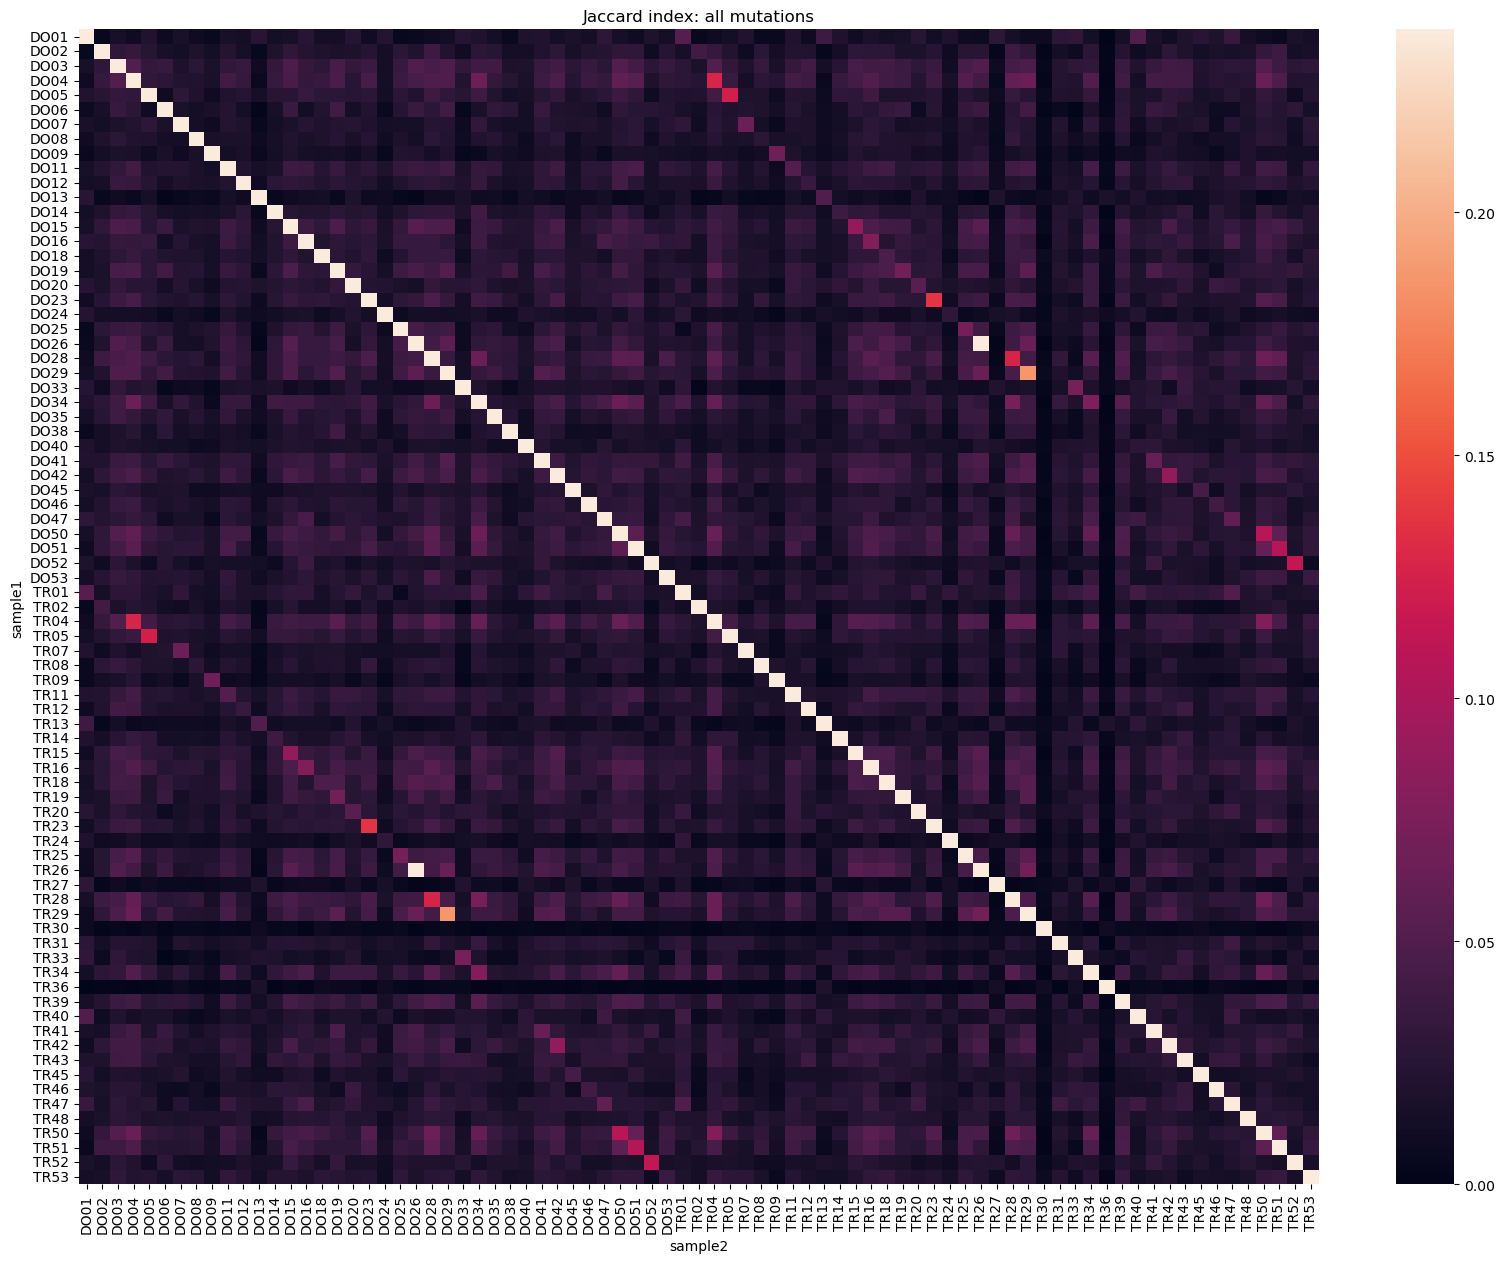

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (20, 15))
sns.heatmap(shared_muts_df.pivot(index = "sample1", columns = "sample2", values = "jaccard_index_allsnvs"), annot = False, fmt=".1f",
           vmax = shared_muts_df.loc[shared_muts_df["jaccard_index_allsnvs"] != 1]["jaccard_index_allsnvs"].max())
ax.set_title("Jaccard index: all mutations")
plt.show()

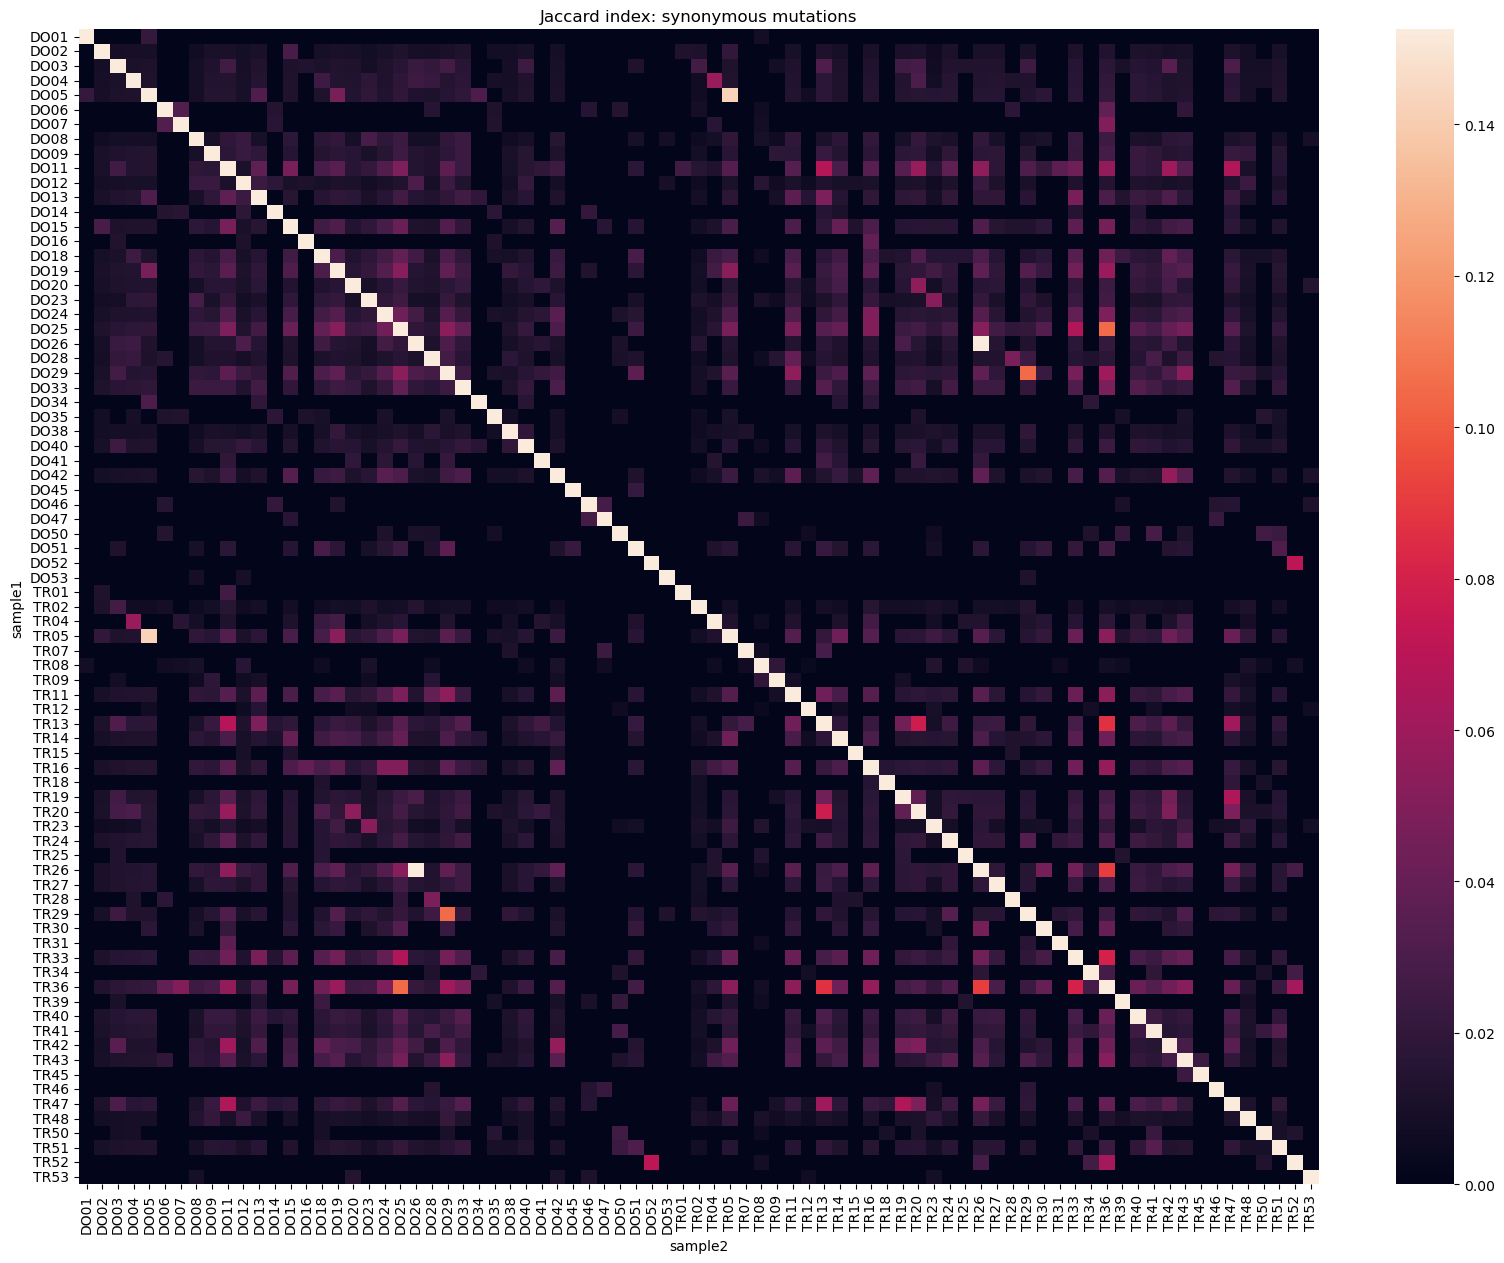

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (20, 15))
sns.heatmap(shared_muts_df.pivot(index = "sample1", columns = "sample2", values = "jaccard_index_synonymous"), annot = False, fmt=".1f",
           vmax = shared_muts_df.loc[shared_muts_df["jaccard_index_synonymous"] != 1]["jaccard_index_synonymous"].max())
ax.set_title("Jaccard index: synonymous mutations")
plt.show()

In [23]:
# include postmorten time as it can correlate with the number of shared mutations
clinvars_df = pd.read_csv(clinvars_file, sep = "\t")
clinvars_df["sample1"] = clinvars_df.apply(lambda row: f'{row["SAMPLE_ID"].split("_")[2][1:]}{row["SAMPLE_ID"].split("_")[1][2:]}', axis = 1)
clinvars_df["sample2"] = clinvars_df.apply(lambda row: f'{row["SAMPLE_ID"].split("_")[2][1:]}{row["SAMPLE_ID"].split("_")[1][2:]}', axis = 1)
clinvars_df
shared_muts_df = shared_muts_df.merge(clinvars_df[["sample1", "postmortem_days"]], on = "sample1", how = "left").rename({"postmortem_days": "postmorten_days_sample1"}, axis = 1)
shared_muts_allgenes_df = shared_muts_df.merge(clinvars_df[["sample2", "postmortem_days"]], on = "sample2", how = "left").rename({"postmortem_days": "postmorten_days_sample2"}, axis = 1)
shared_muts_allgenes_df

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,sample1_numb_muts_missense,sample2_numb_muts_missense,...,numb_shared_muts_nonprotaffecting,jaccard_index_allsnvs,jaccard_index_missense,jaccard_index_nonsense,jaccard_index_truncating,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,postmorten_days_sample1,postmorten_days_sample2
0,TR24,24,trigone,TR24,24,trigone,320,320,116,116,...,170,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2,2
1,DO14,14,dome,TR24,24,trigone,608,320,218,116,...,4,0.008696,0.006024,0.017647,0.013575,0.000000,0.015666,0.010000,6,2
2,DO23,23,dome,TR24,24,trigone,1198,320,423,116,...,8,0.010652,0.001859,0.028369,0.020408,0.010638,0.009631,0.013889,3,2
3,TR40,40,trigone,TR24,24,trigone,159,320,52,116,...,8,0.021322,0.005988,0.032787,0.026667,0.024390,0.023256,0.030888,4,2
4,TR02,02,trigone,TR24,24,trigone,988,320,426,116,...,7,0.006154,0.003704,0.006803,0.004739,0.008000,0.005714,0.012844,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6236,TR13,13,trigone,TR36,36,trigone,128,31,58,6,...,4,0.019231,0.000000,0.000000,0.000000,0.086957,0.054545,0.038095,1,7
6237,DO06,06,dome,TR36,36,trigone,310,31,116,6,...,2,0.002941,0.000000,0.000000,0.000000,0.038462,0.010638,0.019608,2,7
6238,TR41,41,trigone,TR36,36,trigone,289,31,113,6,...,2,0.006289,0.000000,0.012500,0.009524,0.032258,0.023923,0.020202,3,7
6239,TR27,27,trigone,TR36,36,trigone,123,31,42,6,...,1,0.013158,0.021277,0.000000,0.000000,0.029412,0.040541,0.008403,5,7


Text(0.5, 1.0, "Correlation between a donor's shared mutations and time postmorten")

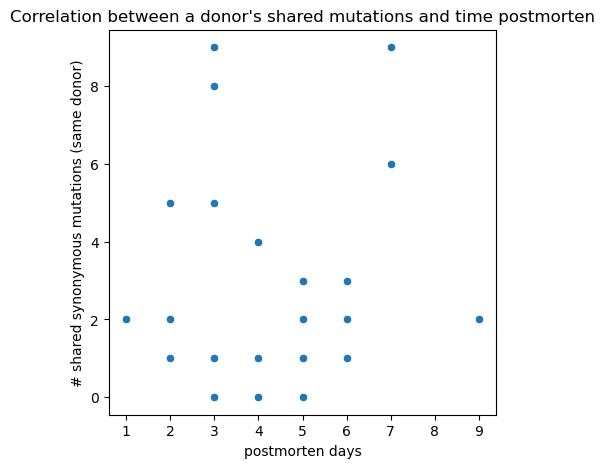

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sns.scatterplot(shared_muts_df.loc[(shared_muts_df["sample1_donorID"] == shared_muts_df["sample2_donorID"]) &
                    (shared_muts_df["sample1"] != shared_muts_df["sample2"])][["postmorten_days_sample1", "numb_shared_muts_synonymous"]].drop_duplicates(),
                x = "postmorten_days_sample1", y = "numb_shared_muts_synonymous", ax = ax)
ax.set_ylabel("# shared synonymous mutations (same donor)")
ax.set_xlabel("postmorten days")
ax.set_title("Correlation between a donor's shared mutations and time postmorten")

Text(0.5, 1.0, "Correlation between a donor's shared mutations and time postmorten")

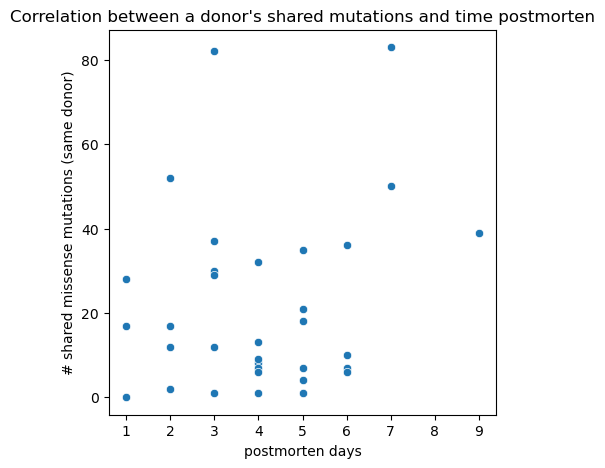

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
sns.scatterplot(shared_muts_df.loc[(shared_muts_df["sample1_donorID"] == shared_muts_df["sample2_donorID"]) &
                    (shared_muts_df["sample1"] != shared_muts_df["sample2"])][["postmorten_days_sample1", "numb_shared_muts_missense"]].drop_duplicates(),
                x = "postmorten_days_sample1", y = "numb_shared_muts_missense", ax = ax)
ax.set_ylabel("# shared missense mutations (same donor)")
ax.set_xlabel("postmorten days")
ax.set_title("Correlation between a donor's shared mutations and time postmorten")

In [26]:
# save for nuria
shared_muts_allgenes_df.to_csv("/data/bbg/projects/bladder_ts/data/complete_cohort/for_nuria/bladder_shared_mutations_allpairs.tsv",
                     sep = "\t", index = False)

## Analyze the shared mutations between all possible pairs of samples, dividing by gene

In [27]:
# count number of shared muts between every pair of samples: total, missense, nonsense, synonymous
shared_muts_dfs_dict = {}
impacts = ["allsnvs", "missense", "nonsense", "synonymous", "indels", "nonprotaffecting", "truncating"]
for impact in impacts:
    print(impact)
    shared_muts_dfs_gene_dict = {}
    for gene in panel:
        if impact == "allsnvs":
            maf_df_f = maf_df.loc[(maf_df["TYPE"] == "SNV") & (maf_df["canonical_SYMBOL"] == gene)].copy()
        elif impact == "indels":
            maf_df_f = maf_df.loc[(maf_df["TYPE"].isin(["INSERTION", "DELETION"])) & (maf_df["canonical_SYMBOL"] == gene)].copy()
        elif impact == "nonprotaffecting":
            maf_df_f = maf_df.loc[(maf_df["Protein_affecting"] == "non_protein_affecting") & (maf_df["canonical_SYMBOL"] == gene)].copy()
        elif impact == "truncating":
            maf_df_f = maf_df.loc[(maf_df["TYPE"] == "SNV") & (maf_df["canonical_Consequence_broader"].isin(["nonsense", "essential_splice"])) &
                        (maf_df["canonical_SYMBOL"] == gene)].copy()
        else:
            maf_df_f = maf_df.loc[(maf_df["TYPE"] == "SNV") & (maf_df["canonical_Consequence_broader"] == impact) & (maf_df["canonical_SYMBOL"] == gene)].copy()
        shared_muts_df = pd.DataFrame(index = maf_df["SAMPLE_ID_short"].unique().tolist(), columns = maf_df["SAMPLE_ID_short"].unique().tolist())
        
        for sample1 in tqdm(maf_df["SAMPLE_ID_short"].unique()):
            sample1_muts = set(maf_df_f.loc[maf_df_f["SAMPLE_ID_short"] == sample1]["MUT_ID"].values)
            
            for sample2 in maf_df["SAMPLE_ID_short"].unique():
                sample2_muts = set(maf_df_f.loc[maf_df_f["SAMPLE_ID_short"] == sample2]["MUT_ID"].values)
        
                shared_muts_df.loc[sample1, sample2] = len(sample1_muts.intersection(sample2_muts))

        shared_muts_dfs_gene_dict[gene] = shared_muts_df.reset_index(names = "sample1").melt(
            id_vars = "sample1", var_name = "sample2", value_name = f"numb_shared_muts_{impact}")
        shared_muts_dfs_gene_dict[gene]["gene"] = gene

    shared_muts_dfs_dict[impact] = pd.concat(shared_muts_dfs_gene_dict.values())

allsnvs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 67.46it/s]


missense


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 68.42it/s]


nonsense


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 66.25it/s]


synonymous


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 69.19it/s]


indels


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 66.36it/s]


nonprotaffecting


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 69.22it/s]


truncating


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 66.34it/s]


In [28]:
# merge
shared_muts_gene_df = shared_muts_dfs_dict["allsnvs"].merge(shared_muts_dfs_dict["missense"], on = ["sample1", "sample2", "gene"], how = "inner").merge(
    shared_muts_dfs_dict["nonsense"], on = ["sample1", "sample2", "gene"], how = "inner"
).merge(
    shared_muts_dfs_dict["synonymous"], on = ["sample1", "sample2", "gene"], how = "inner"
).merge(
    shared_muts_dfs_dict["indels"], on = ["sample1", "sample2", "gene"], how = "inner"
).merge(
    shared_muts_dfs_dict["nonprotaffecting"], on = ["sample1", "sample2", "gene"], how = "inner"
).merge(
    shared_muts_dfs_dict["truncating"], on = ["sample1", "sample2", "gene"], how = "inner"
)
shared_muts_gene_df

,sample1,sample2,numb_shared_muts_allsnvs,gene,numb_shared_muts_missense,numb_shared_muts_nonsense,numb_shared_muts_synonymous,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,numb_shared_muts_truncating
0,TR24,TR24,80,KMT2D,38,13,9,14,28,15
1,DO14,TR24,1,KMT2D,1,0,0,0,0,0
2,DO23,TR24,3,KMT2D,1,2,0,0,0,2
3,TR40,TR24,1,KMT2D,0,1,0,1,0,1
4,TR02,TR24,1,KMT2D,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99851,TR13,TR36,0,TERTpromoter,0,0,0,0,0,0
99852,DO06,TR36,0,TERTpromoter,0,0,0,0,0,0
99853,TR41,TR36,0,TERTpromoter,0,0,0,0,0,0
99854,TR27,TR36,0,TERTpromoter,0,0,0,0,0,0


In [29]:
# count number of mutations per sample per impact
impacts = ["allsnvs", "missense", "nonsense", "synonymous", "indels", "nonprotaffecting", "truncating"]
for impact in impacts:
    print(impact)
    nmuts_dfs_gene_dict = {}
    for gene in panel:
        if impact == "allsnvs":
            maf_df_f = maf_df.loc[(maf_df["TYPE"] == "SNV") & (maf_df["canonical_SYMBOL"] == gene)].copy()
        elif impact == "indels":
            maf_df_f = maf_df.loc[(maf_df["TYPE"].isin(["INSERTION", "DELETION"])) & (maf_df["canonical_SYMBOL"] == gene)].copy()
        elif impact == "nonprotaffecting":
            maf_df_f = maf_df.loc[(maf_df["Protein_affecting"] == "non_protein_affecting") & (maf_df["canonical_SYMBOL"] == gene)].copy()
        elif impact == "truncating":
            maf_df_f = maf_df.loc[(maf_df["TYPE"] == "SNV") & (maf_df["canonical_Consequence_broader"].isin(["nonsense", "essential_splice"])) &
                        (maf_df["canonical_SYMBOL"] == gene)].copy()
        else:
            maf_df_f = maf_df.loc[(maf_df["TYPE"] == "SNV") & (maf_df["canonical_Consequence_broader"] == impact) & (maf_df["canonical_SYMBOL"] == gene)].copy()

        nmuts_dfs_gene_dict[gene] = maf_df_f.groupby(["SAMPLE_ID_short", "canonical_SYMBOL"]).size().to_frame(f"sample1_numb_muts_{impact}").reset_index(names = ["sample1", "gene"])
    
    nmuts_df = pd.concat(nmuts_dfs_gene_dict.values())
    shared_muts_gene_df = shared_muts_gene_df.merge(nmuts_df, on = ["sample1", "gene"], how = "inner")
    nmuts_df = nmuts_df.rename({f"sample1_numb_muts_{impact}": f"sample2_numb_muts_{impact}", "sample1": "sample2"}, axis = 1)
    shared_muts_gene_df = shared_muts_gene_df.merge(nmuts_df, on = ["sample2", "gene"], how = "inner")

shared_muts_gene_df

allsnvs
missense
nonsense
synonymous
indels
nonprotaffecting
truncating


,sample1,sample2,numb_shared_muts_allsnvs,gene,numb_shared_muts_missense,numb_shared_muts_nonsense,numb_shared_muts_synonymous,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,numb_shared_muts_truncating,...,sample1_numb_muts_nonsense,sample2_numb_muts_nonsense,sample1_numb_muts_synonymous,sample2_numb_muts_synonymous,sample1_numb_muts_indels,sample2_numb_muts_indels,sample1_numb_muts_nonprotaffecting,sample2_numb_muts_nonprotaffecting,sample1_numb_muts_truncating,sample2_numb_muts_truncating
0,TR24,TR24,80,KMT2D,38,13,9,14,28,15,...,13,13,9,9,14,14,28,28,15,15
1,DO14,TR24,1,KMT2D,1,0,0,0,0,0,...,32,13,10,9,44,14,43,28,37,15
2,DO23,TR24,3,KMT2D,1,2,0,0,0,2,...,108,13,21,9,175,14,80,28,138,15
3,TR40,TR24,1,KMT2D,0,1,0,1,0,1,...,5,13,4,9,14,14,11,28,5,15
4,TR02,TR24,1,KMT2D,0,0,0,0,1,0,...,34,13,20,9,50,14,58,28,49,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30411,TR48,TR48,27,RB1,2,1,4,20,34,2,...,1,1,4,4,20,20,34,34,2,2
30412,TR09,TR09,38,FGFR3,11,1,2,5,24,1,...,1,1,2,2,5,5,24,24,1,1
30413,TR04,TR09,0,FGFR3,0,0,0,0,0,0,...,1,1,1,2,1,5,5,24,1,1
30414,TR09,TR04,0,FGFR3,0,0,0,0,0,0,...,1,1,2,1,5,1,24,5,1,1


In [30]:
# calculate jaccard index: shared / (sample1+sample2-shared)
impacts = ["allsnvs", "missense", "nonsense", "synonymous", "indels", "nonprotaffecting", "truncating"]
for impact in tqdm(impacts):
    shared_muts_gene_df[f"jaccard_index_{impact}"] = shared_muts_gene_df[f"numb_shared_muts_{impact}"] / ( shared_muts_gene_df[f"sample1_numb_muts_{impact}"] + shared_muts_gene_df[f"sample2_numb_muts_{impact}"] - shared_muts_gene_df[f"numb_shared_muts_{impact}"] )

shared_muts_gene_df

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 700.23it/s]


,sample1,sample2,numb_shared_muts_allsnvs,gene,numb_shared_muts_missense,numb_shared_muts_nonsense,numb_shared_muts_synonymous,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,numb_shared_muts_truncating,...,sample2_numb_muts_nonprotaffecting,sample1_numb_muts_truncating,sample2_numb_muts_truncating,jaccard_index_allsnvs,jaccard_index_missense,jaccard_index_nonsense,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,jaccard_index_truncating
0,TR24,TR24,80,KMT2D,38,13,9,14,28,15,...,28,15,15,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,DO14,TR24,1,KMT2D,1,0,0,0,0,0,...,28,37,15,0.00495,0.011628,0.0,0.0,0.0,0.0,0.0
2,DO23,TR24,3,KMT2D,1,2,0,0,0,2,...,28,138,15,0.007075,0.006494,0.016807,0.0,0.0,0.0,0.013245
3,TR40,TR24,1,KMT2D,0,1,0,1,0,1,...,28,5,15,0.009346,0.0,0.058824,0.0,0.037037,0.0,0.052632
4,TR02,TR24,1,KMT2D,0,0,0,0,1,0,...,28,49,15,0.003289,0.0,0.0,0.0,0.0,0.011765,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30411,TR48,TR48,27,RB1,2,1,4,20,34,2,...,34,2,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
30412,TR09,TR09,38,FGFR3,11,1,2,5,24,1,...,24,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
30413,TR04,TR09,0,FGFR3,0,0,0,0,0,0,...,24,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30414,TR09,TR04,0,FGFR3,0,0,0,0,0,0,...,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# add donor ID and bladder location
shared_muts_gene_df["sample1_donorID"] = shared_muts_gene_df.apply(lambda row: row["sample1"][2:], axis = 1)
shared_muts_gene_df["sample2_donorID"] = shared_muts_gene_df.apply(lambda row: row["sample2"][2:], axis = 1)
shared_muts_gene_df["sample1_bladder_location"] = shared_muts_gene_df.apply(lambda row: row["sample1"][:2], axis = 1)
shared_muts_gene_df["sample2_bladder_location"] = shared_muts_gene_df.apply(lambda row: row["sample2"][:2], axis = 1)
shared_muts_gene_df = shared_muts_gene_df.replace("TR", "trigone")
shared_muts_gene_df = shared_muts_gene_df.replace("DO", "dome")
shared_muts_gene_df

,sample1,sample2,numb_shared_muts_allsnvs,gene,numb_shared_muts_missense,numb_shared_muts_nonsense,numb_shared_muts_synonymous,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,numb_shared_muts_truncating,...,jaccard_index_missense,jaccard_index_nonsense,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,jaccard_index_truncating,sample1_donorID,sample2_donorID,sample1_bladder_location,sample2_bladder_location
0,TR24,TR24,80,KMT2D,38,13,9,14,28,15,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,24,24,trigone,trigone
1,DO14,TR24,1,KMT2D,1,0,0,0,0,0,...,0.011628,0.000000,0.0,0.000000,0.000000,0.000000,14,24,dome,trigone
2,DO23,TR24,3,KMT2D,1,2,0,0,0,2,...,0.006494,0.016807,0.0,0.000000,0.000000,0.013245,23,24,dome,trigone
3,TR40,TR24,1,KMT2D,0,1,0,1,0,1,...,0.000000,0.058824,0.0,0.037037,0.000000,0.052632,40,24,trigone,trigone
4,TR02,TR24,1,KMT2D,0,0,0,0,1,0,...,0.000000,0.000000,0.0,0.000000,0.011765,0.000000,02,24,trigone,trigone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30411,TR48,TR48,27,RB1,2,1,4,20,34,2,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,48,48,trigone,trigone
30412,TR09,TR09,38,FGFR3,11,1,2,5,24,1,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,09,09,trigone,trigone
30413,TR04,TR09,0,FGFR3,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,04,09,trigone,trigone
30414,TR09,TR04,0,FGFR3,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,09,04,trigone,trigone


In [33]:
# include postmorten time as it can correlate with the number of shared mutations
shared_muts_gene_df = shared_muts_gene_df.merge(clinvars_df[["sample1", "postmortem_days"]], on = "sample1", how = "left").rename({"postmortem_days": "postmorten_days_sample1"}, axis = 1)
shared_muts_gene_df = shared_muts_gene_df.merge(clinvars_df[["sample2", "postmortem_days"]], on = "sample2", how = "left").rename({"postmortem_days": "postmorten_days_sample2"}, axis = 1)
shared_muts_gene_df

,sample1,sample2,numb_shared_muts_allsnvs,gene,numb_shared_muts_missense,numb_shared_muts_nonsense,numb_shared_muts_synonymous,numb_shared_muts_indels,numb_shared_muts_nonprotaffecting,numb_shared_muts_truncating,...,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,jaccard_index_truncating,sample1_donorID,sample2_donorID,sample1_bladder_location,sample2_bladder_location,postmorten_days_sample1,postmorten_days_sample2
0,TR24,TR24,80,KMT2D,38,13,9,14,28,15,...,1.0,1.000000,1.000000,1.000000,24,24,trigone,trigone,2,2
1,DO14,TR24,1,KMT2D,1,0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,14,24,dome,trigone,6,2
2,DO23,TR24,3,KMT2D,1,2,0,0,0,2,...,0.0,0.000000,0.000000,0.013245,23,24,dome,trigone,3,2
3,TR40,TR24,1,KMT2D,0,1,0,1,0,1,...,0.0,0.037037,0.000000,0.052632,40,24,trigone,trigone,4,2
4,TR02,TR24,1,KMT2D,0,0,0,0,1,0,...,0.0,0.000000,0.011765,0.000000,02,24,trigone,trigone,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30411,TR48,TR48,27,RB1,2,1,4,20,34,2,...,1.0,1.000000,1.000000,1.000000,48,48,trigone,trigone,2,2
30412,TR09,TR09,38,FGFR3,11,1,2,5,24,1,...,1.0,1.000000,1.000000,1.000000,09,09,trigone,trigone,9,9
30413,TR04,TR09,0,FGFR3,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,04,09,trigone,trigone,3,9
30414,TR09,TR04,0,FGFR3,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.000000,09,04,trigone,trigone,9,3


In [34]:
# concat with all_genes df
shared_muts_allgenes_df["gene"] = "ALL_GENES"
shared_muts_df = pd.concat([shared_muts_allgenes_df, shared_muts_gene_df])
shared_muts_df

,sample1,sample1_donorID,sample1_bladder_location,sample2,sample2_donorID,sample2_bladder_location,sample1_numb_muts_allsnvs,sample2_numb_muts_allsnvs,sample1_numb_muts_missense,sample2_numb_muts_missense,...,jaccard_index_allsnvs,jaccard_index_missense,jaccard_index_nonsense,jaccard_index_truncating,jaccard_index_synonymous,jaccard_index_indels,jaccard_index_nonprotaffecting,postmorten_days_sample1,postmorten_days_sample2,gene
0,TR24,24,trigone,TR24,24,trigone,320,320,116,116,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2,2,ALL_GENES
1,DO14,14,dome,TR24,24,trigone,608,320,218,116,...,0.008696,0.006024,0.017647,0.013575,0.000000,0.015666,0.010000,6,2,ALL_GENES
2,DO23,23,dome,TR24,24,trigone,1198,320,423,116,...,0.010652,0.001859,0.028369,0.020408,0.010638,0.009631,0.013889,3,2,ALL_GENES
3,TR40,40,trigone,TR24,24,trigone,159,320,52,116,...,0.021322,0.005988,0.032787,0.026667,0.024390,0.023256,0.030888,4,2,ALL_GENES
4,TR02,02,trigone,TR24,24,trigone,988,320,426,116,...,0.006154,0.003704,0.006803,0.004739,0.008000,0.005714,0.012844,1,2,ALL_GENES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30411,TR48,48,trigone,TR48,48,trigone,27,27,2,2,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2,2,RB1
30412,TR09,09,trigone,TR09,09,trigone,38,38,11,11,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9,9,FGFR3
30413,TR04,04,trigone,TR09,09,trigone,12,38,6,11,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,9,FGFR3
30414,TR09,09,trigone,TR04,04,trigone,38,12,11,6,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,3,FGFR3


In [35]:
shared_muts_df.to_csv("/data/bbg/projects/bladder_ts/data/complete_cohort/for_nuria/bladder_shared_mutations_allpairs_separatedByGenes.tsv",
                     sep = "\t", index = False)